<a href="https://colab.research.google.com/github/joaozalina/TelecomX_2/blob/main/TelecomX_Parte2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***
# <font color=green size=10>Telecom X – Parte 2: Prevendo Churn (evasão de clientes)</font>
***

# <font color=green>Sobre o projeto</font>
***

### Challenge Telecom X - 2 parte

A **Nossa missão nessa segunda parte do TelecomX** é desenvolver modelos preditivos capazes de prever quais clientes têm maior chance de cancelar seus serviços.

A empresa quer antecipar o problema da evasão, e devemos construir um pipeline robusto para essa etapa inicial de modelagem.

### 🧠 Objetivos do Desafio

Preparar os dados para a modelagem (tratamento, encoding, normalização).

Realizar análise de correlação e seleção de variáveis.

Treinar dois ou mais modelos de classificação.

Avaliar o desempenho dos modelos com métricas.

Interpretar os resultados, incluindo a importância das variáveis.

Criar uma conclusão estratégica apontando os principais fatores que influenciam a evasão.

# Importando bibliotecas  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Importando o data set

In [2]:
dados = 'telecomDF.csv'

In [3]:
telecomDF = pd.read_csv(dados)

In [4]:
telecomDF.head()

,ID_Cliente,Rotatividade,Sexo,Idoso,Parceiro,Dependentes,TempoFidelidade,ServiçoTelefônico,MultiplasLinhas,ServiçoInternet,...,ProteçãoDispositivo,SuporteTecnico,StreamingTV,StreamingFilmes,Contrato,FaturamentoEletronico,MetodoPagamento,CobrançaMensal,CobrançaTotal,Contas_Diarias
0,0002-ORFBO,0,Female,0,1,1,9,1,No,DSL,...,No,Yes,Yes,No,One year,1,Mailed check,65.6,593.30,15203.886667
1,0003-MKNFE,0,Male,0,0,0,9,1,Yes,DSL,...,No,No,No,Yes,Month-to-month,0,Mailed check,59.9,542.40,15203.886667
2,0004-TLHLJ,1,Male,0,0,0,4,1,No,Fiber optic,...,Yes,No,No,No,Month-to-month,1,Electronic check,73.9,280.85,15203.886667
3,0011-IGKFF,1,Male,1,1,0,13,1,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,1,Electronic check,98.0,1237.85,15203.886667
4,0013-EXCHZ,1,Female,1,1,0,3,1,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,1,Mailed check,83.9,267.40,15203.886667


# **Removendo colunas irrelevantes**

In [5]:
telecomDF = telecomDF.drop(columns=['ID_Cliente', 'Contas_Diarias'], axis=1)
telecomDF


,Rotatividade,Sexo,Idoso,Parceiro,Dependentes,TempoFidelidade,ServiçoTelefônico,MultiplasLinhas,ServiçoInternet,SegurançaOnline,BackupOnline,ProteçãoDispositivo,SuporteTecnico,StreamingTV,StreamingFilmes,Contrato,FaturamentoEletronico,MetodoPagamento,CobrançaMensal,CobrançaTotal
0,0,Female,0,1,1,9,1,No,DSL,No,Yes,No,Yes,Yes,No,One year,1,Mailed check,65.60,593.30
1,0,Male,0,0,0,9,1,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,0,Mailed check,59.90,542.40
2,1,Male,0,0,0,4,1,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,1,Electronic check,73.90,280.85
3,1,Male,1,1,0,13,1,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,1,Electronic check,98.00,1237.85
4,1,Female,1,1,0,3,1,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,1,Mailed check,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,Female,0,0,0,13,1,No,DSL,Yes,No,No,Yes,No,No,One year,0,Mailed check,55.15,742.90
7039,1,Male,0,1,0,22,1,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,1,Electronic check,85.10,1873.70
7040,0,Male,0,0,0,2,1,No,DSL,No,Yes,No,No,No,No,Month-to-month,1,Mailed check,50.30,92.75
7041,0,Male,0,1,1,67,1,No,DSL,Yes,No,Yes,Yes,No,Yes,Two year,0,Mailed check,67.85,4627.65


#### <font color='red'>Remoção de Colunas Irrelevantes</font>
***
> Eliminei colunas que não trazem valor para a análise ou para os modelos preditivos. As colunas removidas não ajudam na previsão da evasão e podem até prejudicar o desempenho dos modelos.

Foram elas:
> 1. ID_Cliente
> 2. Contas_Diarias

### Renomeando a coluna que será usada como **variável alvo**.

In [6]:
telecomDF.rename(columns={'Rotatividade': 'Evasao_Clientes'}, inplace=True)

In [7]:
# Confirmando a alteração.
telecomDF.head(2)

,Evasao_Clientes,Sexo,Idoso,Parceiro,Dependentes,TempoFidelidade,ServiçoTelefônico,MultiplasLinhas,ServiçoInternet,SegurançaOnline,BackupOnline,ProteçãoDispositivo,SuporteTecnico,StreamingTV,StreamingFilmes,Contrato,FaturamentoEletronico,MetodoPagamento,CobrançaMensal,CobrançaTotal
0,0,Female,0,1,1,9,1,No,DSL,No,Yes,No,Yes,Yes,No,One year,1,Mailed check,65.6,593.3
1,0,Male,0,0,0,9,1,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,0,Mailed check,59.9,542.4


### Verificando dados únicos nas colunas de uma só vez.

In [8]:
telecomDF.columns

Index(['Evasao_Clientes', 'Sexo', 'Idoso', 'Parceiro', 'Dependentes',
       'TempoFidelidade', 'ServiçoTelefônico', 'MultiplasLinhas',
       'ServiçoInternet', 'SegurançaOnline', 'BackupOnline',
       'ProteçãoDispositivo', 'SuporteTecnico', 'StreamingTV',
       'StreamingFilmes', 'Contrato', 'FaturamentoEletronico',
       'MetodoPagamento', 'CobrançaMensal', 'CobrançaTotal'],
      dtype='object')

In [9]:
valores_unicos = ['Evasao_Clientes', 'Sexo', 'Idoso', 'Parceiro', 'Dependentes',
       'TempoFidelidade', 'ServiçoTelefônico', 'MultiplasLinhas',
       'ServiçoInternet', 'SegurançaOnline', 'BackupOnline',
       'ProteçãoDispositivo', 'SuporteTecnico', 'StreamingTV',
       'StreamingFilmes', 'Contrato', 'FaturamentoEletronico',
       'MetodoPagamento', 'CobrançaMensal', 'CobrançaTotal']

for valor in valores_unicos:
    print(f"Valores únicos em {valor}:", telecomDF[valor].unique())

Valores únicos em Evasao_Clientes: [0 1]
Valores únicos em Sexo: ['Female' 'Male']
Valores únicos em Idoso: [0 1]
Valores únicos em Parceiro: [1 0]
Valores únicos em Dependentes: [1 0]
Valores únicos em TempoFidelidade: [ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 37 49 66 67
 20 43 59 12 27  2 25 29 14 35 64 39 40 11  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 31 36 17 18 51 38 42
  0]
Valores únicos em ServiçoTelefônico: [1 0]
Valores únicos em MultiplasLinhas: ['No' 'Yes' 'No phone service']
Valores únicos em ServiçoInternet: ['DSL' 'Fiber optic' 'No']
Valores únicos em SegurançaOnline: ['No' 'Yes' 'No internet service']
Valores únicos em BackupOnline: ['Yes' 'No' 'No internet service']
Valores únicos em ProteçãoDispositivo: ['No' 'Yes' 'No internet service']
Valores únicos em SuporteTecnico: ['Yes' 'No' 'No internet service']
Valores únicos em StreamingTV: ['Yes' 'No' 'No internet service']
Valores únicos em StreamingFilmes: ['N

# Encoding

Confirmando os tipos de dados no data frame

In [10]:
telecomDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Evasao_Clientes        7043 non-null   int64  
 1   Sexo                   7043 non-null   object 
 2   Idoso                  7043 non-null   int64  
 3   Parceiro               7043 non-null   int64  
 4   Dependentes            7043 non-null   int64  
 5   TempoFidelidade        7043 non-null   int64  
 6   ServiçoTelefônico      7043 non-null   int64  
 7   MultiplasLinhas        7043 non-null   object 
 8   ServiçoInternet        7043 non-null   object 
 9   SegurançaOnline        7043 non-null   object 
 10  BackupOnline           7043 non-null   object 
 11  ProteçãoDispositivo    7043 non-null   object 
 12  SuporteTecnico         7043 non-null   object 
 13  StreamingTV            7043 non-null   object 
 14  StreamingFilmes        7043 non-null   object 
 15  Cont

Separando a variável **ALVO** e as variáveis **EXPLICATIVAS**.

In [11]:
#Variáveis EXPLICATIVAS
x = telecomDF.drop('Evasao_Clientes', axis=1)

#Variável ALVO
y = telecomDF['Evasao_Clientes']

### Transformando as variáveis EXPLICATIVAS

A transformação é necessário porque o algorítimo do computador ***só entende informações numéricas***.

Aplicando: ONE-HOT Encoding

In [12]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

In [13]:
'''
Para não perder os nomes das conlunas ao aplicar o One-hot encoding, vou salvar
os nomes das colunas em uma variável.
'''
colunas = x.columns

In [14]:
'''
OBS: Na função 'make_column_transformer()', que irá transformar as colunas cate-
góricas, o PRIMEIRO PARÂMETRO que vou usar será uma TUPLA, onde eu vou passar
qual será o tipo de transformação (no caso, o One-Hot Encoding) e em quais colu-
nas vou aplicar essa transformação, pois tem colunas que já são NUMÉRICAS.



OBS²: Eu já havia transformado algumas colunas categóricas em numéricas quando
fiz a análise exploratória do 'TelecomX 1'. Sendo assim, as que já haviam sido
transformadas ao analisar o 'TelecomX 1' não serão inseridas no parâmetro.

OBS³: O parâmetro remaider= 'passthrough' serve para que, ao aplicar o One-Hot
encoding, não sejam "perdidas" as colunas numéricas.

Já o parâmetro 'sparse_threshold=0' server para que sejam mantidos os valores
das colunas.

'''

one_hot = make_column_transformer((
    OneHotEncoder(drop= 'if_binary'),
    ['Sexo','MultiplasLinhas','ServiçoInternet','SegurançaOnline','BackupOnline',
     'ProteçãoDispositivo','SuporteTecnico','StreamingTV','StreamingFilmes',
     'Contrato','MetodoPagamento']
),
    remainder='passthrough',
    sparse_threshold=0)

In [15]:
# Transformando verdadeiramente as colunas.

'''
Até o momento, o One-Hot Encoding apenas armazenou a transformação. Para usá-lo,
vou usar novamente o One-Hot Encoding, mas com o método 'fit_transform()'.
'''

x = one_hot.fit_transform(x)

Verificando **os nomes das novas colunas** que a função One-Hot encoding criou.

In [16]:
'''
Para fazer essa verificação, usarei a função "get_feature_names_out()" + o parâ-
metro "colunas" que criei anteriormente.

'''

one_hot.get_feature_names_out(colunas)

array(['onehotencoder__Sexo_Male', 'onehotencoder__MultiplasLinhas_No',
       'onehotencoder__MultiplasLinhas_No phone service',
       'onehotencoder__MultiplasLinhas_Yes',
       'onehotencoder__ServiçoInternet_DSL',
       'onehotencoder__ServiçoInternet_Fiber optic',
       'onehotencoder__ServiçoInternet_No',
       'onehotencoder__SegurançaOnline_No',
       'onehotencoder__SegurançaOnline_No internet service',
       'onehotencoder__SegurançaOnline_Yes',
       'onehotencoder__BackupOnline_No',
       'onehotencoder__BackupOnline_No internet service',
       'onehotencoder__BackupOnline_Yes',
       'onehotencoder__ProteçãoDispositivo_No',
       'onehotencoder__ProteçãoDispositivo_No internet service',
       'onehotencoder__ProteçãoDispositivo_Yes',
       'onehotencoder__SuporteTecnico_No',
       'onehotencoder__SuporteTecnico_No internet service',
       'onehotencoder__SuporteTecnico_Yes',
       'onehotencoder__StreamingTV_No',
       'onehotencoder__StreamingTV_No inter

Visualizando os dados do 'x' com o **pd.DataFrame( )**.

Isso é uma alternativa para vermos os dados da forma que o Pandas nos fornece.

In [17]:
pd.DataFrame(x, columns=one_hot.get_feature_names_out(colunas))

,onehotencoder__Sexo_Male,onehotencoder__MultiplasLinhas_No,onehotencoder__MultiplasLinhas_No phone service,onehotencoder__MultiplasLinhas_Yes,onehotencoder__ServiçoInternet_DSL,onehotencoder__ServiçoInternet_Fiber optic,onehotencoder__ServiçoInternet_No,onehotencoder__SegurançaOnline_No,onehotencoder__SegurançaOnline_No internet service,onehotencoder__SegurançaOnline_Yes,...,onehotencoder__MetodoPagamento_Electronic check,onehotencoder__MetodoPagamento_Mailed check,remainder__Idoso,remainder__Parceiro,remainder__Dependentes,remainder__TempoFidelidade,remainder__ServiçoTelefônico,remainder__FaturamentoEletronico,remainder__CobrançaMensal,remainder__CobrançaTotal
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,1.0,9.0,1.0,1.0,65.60,593.30
1,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,9.0,1.0,0.0,59.90,542.40
2,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,4.0,1.0,1.0,73.90,280.85
3,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,1.0,0.0,13.0,1.0,1.0,98.00,1237.85
4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,1.0,1.0,0.0,3.0,1.0,1.0,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,13.0,1.0,0.0,55.15,742.90
7039,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,22.0,1.0,1.0,85.10,1873.70
7040,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,2.0,1.0,1.0,50.30,92.75
7041,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,1.0,67.0,1.0,0.0,67.85,4627.65


# Verificação da ***Proporção de Evasão***

In [18]:
# Criando o histograma
fig = px.histogram(
    telecomDF,
    x='Evasao_Clientes',
    text_auto=True,
    color='Evasao_Clientes',
    title='Distribuição de Evasão de Clientes'
)

# Colocando o subtítulo
fig.add_annotation(
    text="0 = Não, 1 = Sim",
    xref="paper", yref="paper",
    x=0.5, y=1.05,  # Posição do subtítulo (centralizado, acima do título)
    showarrow=False,
    font=dict(size=12),
    align="center"
)

# Ajustar o layout para evitar sobreposição
fig.update_layout(
    margin=dict(t=80),  # Aumentar a margem superior para acomodar o subtítulo
    title_x=0.5  # Centralizar o título principal
)

fig.show()

# Análise Direcionada

Investigarei como variáveis específicas se relacionam com a evasão, como:

*   **Tempo de contrato** × Evasão
*   **Total gasto** × Evasão

Usarei boxplots para o gráfico.


Tempo de contrato × Evasão

In [68]:
# TempoFidelidade (Tempo de contrato) vs. Evasão
fig1 = px.box(
    telecomDF,
    x='Evasao_Clientes',
    y='TempoFidelidade',
    color='Evasao_Clientes',
    title='Distribuição de Tempo de Fidelidade por Evasão de Clientes',
    labels={'TempoFidelidade': 'Tempo de Fidelidade (meses)', 'Evasao_Clientes': 'Evasão de Clientes'},
    category_orders={'Evasao_Clientes': ['Não', 'Sim']}  # Ordenar as categorias
)

fig1.update_layout(
    xaxis_title='Evasão de Clientes',
    yaxis_title='Tempo de Fidelidade (meses)',
    showlegend=False  # Remove legenda redundante
)

fig1.add_annotation(
    text="Legenda: 0 = Não, 1 = Sim",
    xref="paper",
    yref="paper",
    x=0.5,
    y=-0.20,  # Posição abaixo do gráfico
    showarrow=False,
    font=dict(size=12),
    align="center")

fig1.show()

Total gasto x Evasão

In [71]:
# CobrançaTotal(Total gasto) x Evasão
fig2 = px.box(
    telecomDF,
    x='Evasao_Clientes',
    y='CobrançaTotal',
    color='Evasao_Clientes',
    title='Distribuição de Total Gasto x Evasão de Clientes<br>',
    labels={'CobrançaTotal': 'Total Gasto (R$)', 'Evasao_Clientes': 'Evasão de Clientes'},
    category_orders={'Evasao_Clientes': ['Não', 'Sim']},
    color_discrete_map={'Não': '#36A2EB', 'Sim': '#FF6384'}
)

# Ajustando o layout com legenda no eixo x
fig2.update_layout(
    xaxis_title='Evasão de Clientes',
    yaxis_title='Total Gasto (R$)',
    showlegend=False,
    title_x=0.5,
    margin=dict(t=80)
)

# Adicionando legenda adicional
fig2.add_annotation(
    text="Legenda: 0 = Não, 1 = Sim",
    xref="paper",
    yref="paper",
    x=0.5,
    y=-0.20,
    showarrow=False,
    font=dict(size=12),
    align="center"
)

# Exibindo o gráfico
fig2.show()

# 🤖 Criando a Modelagem Preditiva

## Separação de Dados

Seração para treino e teste.

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, stratify = y, random_state = 5)

Usando modelo simples para classificação: ***DummyClassifier***

In [23]:
from sklearn.dummy import DummyClassifier

In [24]:
dummy = DummyClassifier()
dummy.fit(x_treino, y_treino)

#Verificando a taxa com 'dummy score()'.
dummy.score(x_teste, y_teste)

0.7348097671777399

# Criando modelo complexo com "**Árvore de Decisão**".

In [25]:
from sklearn.tree import DecisionTreeClassifier

In [26]:
arvore = DecisionTreeClassifier(random_state = 5)
arvore.fit(x_treino, y_treino)

DecisionTreeClassifier(random_state=5)

In [27]:
arvore.predict(x_teste)

array([1, 0, 0, ..., 1, 0, 0])

In [28]:
# Verificando a taxa de acerto da previsão: 'arvore.predict(x_teste)'

arvore.score(x_teste, y_teste)

0.7228847245883021

### Verificando todas as escolhas feitas pela árvore de decisão: ***Criação de um gráfico.***

In [29]:
from sklearn.tree import plot_tree

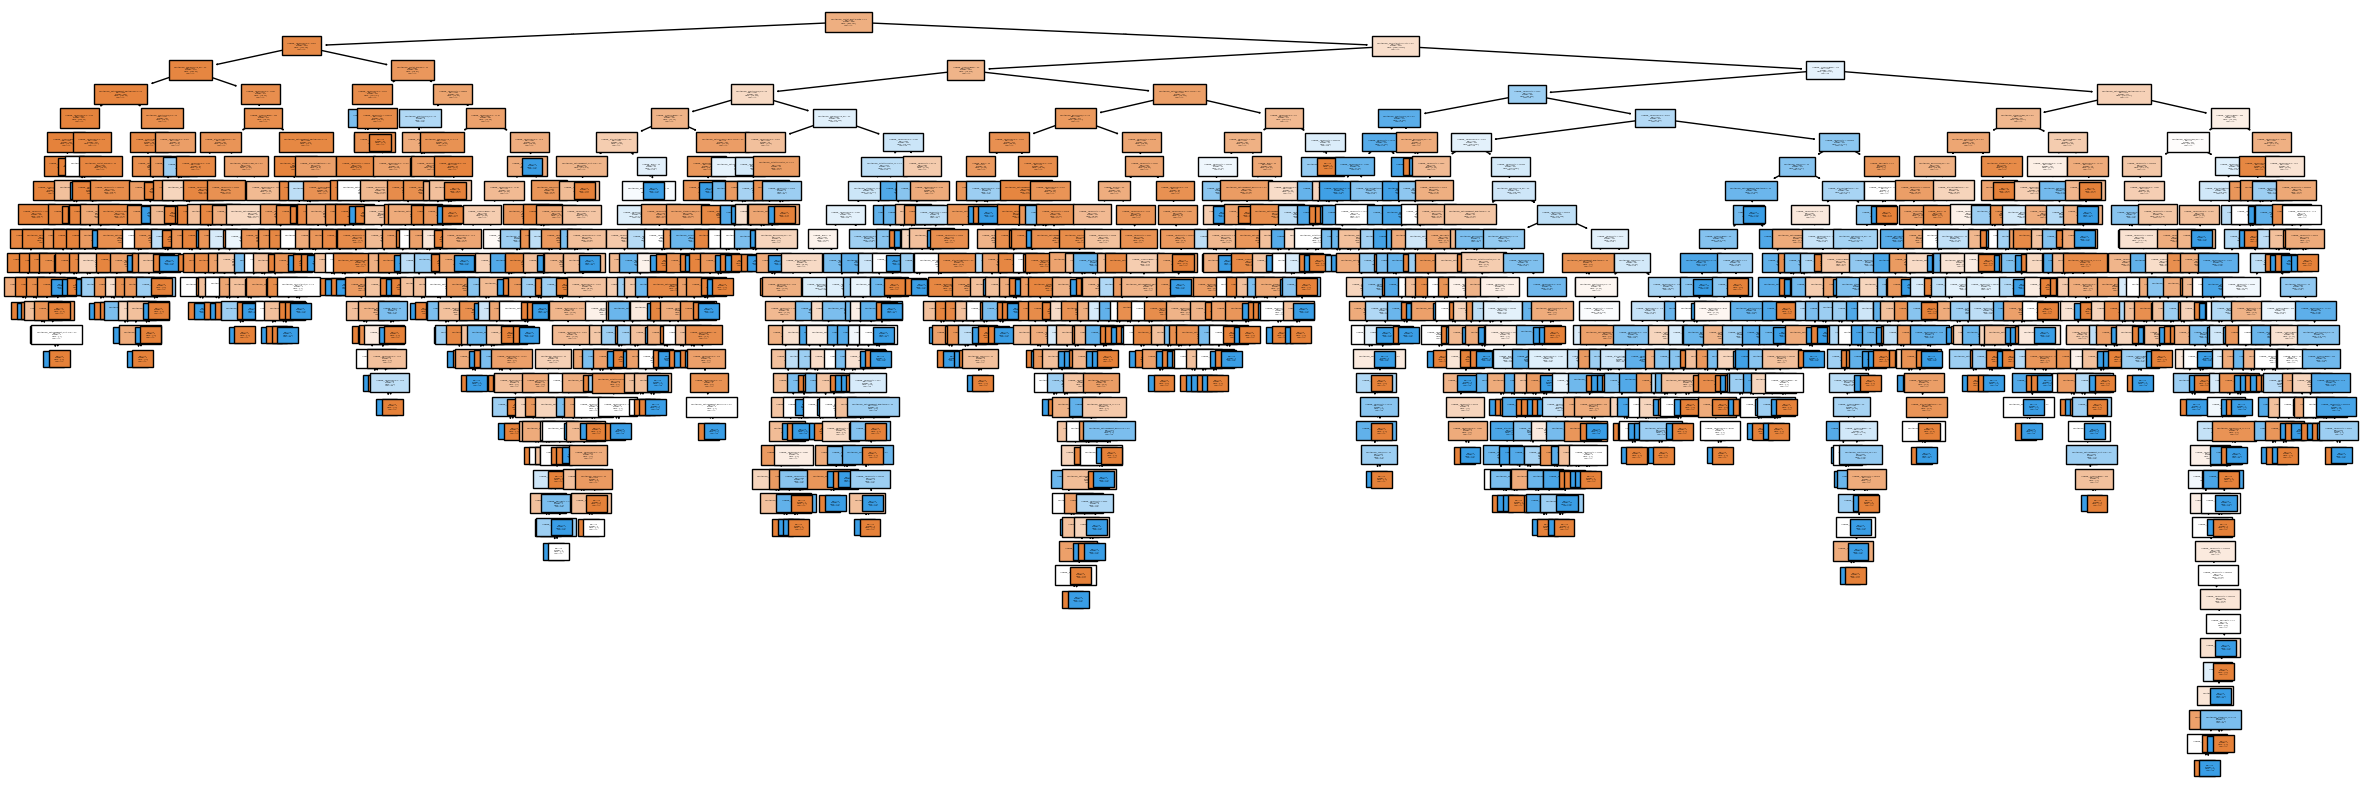

In [30]:
plt.figure(figsize=(30,10))
plot_tree(arvore, filled=True, class_names= ['não', 'sim'], fontsize = 1, feature_names = one_hot.get_feature_names_out(colunas));
#plt.show()

OBS: O algorítimo criado tomou muitas decisões até chegar no resultado final, conforme o gráfico acima.

In [31]:
# Verificando Score
arvore.score(x_treino, y_treino)

0.9977281332828474

Embora a taxa de acerto do 'arvore.score' não tenha sido de 100%, o valore está muito próximo. Isso pode indicar que o algorítimo **não está aprendendo** com os dados, mas, sim, **decorando** os resultados.

## Usando o ' **max depth =** ' para o ajuste no algorítimo da Árvore de Decisão, para melhorar o resultado, de forma que o algorítimo tome decisões, mas não vá até o final dos dados de treinamento.

In [32]:
# Criando um novo modelo com os dados ajustados (max_depth).
arvore = DecisionTreeClassifier(max_depth = 3, random_state = 5)
arvore.fit(x_treino, y_treino)

DecisionTreeClassifier(max_depth=3, random_state=5)

Verificando novamente a taxa de acerto com os **dados ajustados**.

In [33]:
'''
É possível ver que o algorítimo está 'errando', o que significa que não está de-
corando os resultados.

'''
arvore.score(x_treino, y_treino)



0.7889057175312382

In [34]:
# Avaliando a taxa de acerto com os 'dados de teste'.

# OBS: O resulatado saiu melhor do que o mesmo modelo USADO NO INÍCIO.

arvore.score(x_teste, y_teste)

0.7995457126632595

Visualizando novamente as decisões da Árvore, mas com os **dados ajustados**.

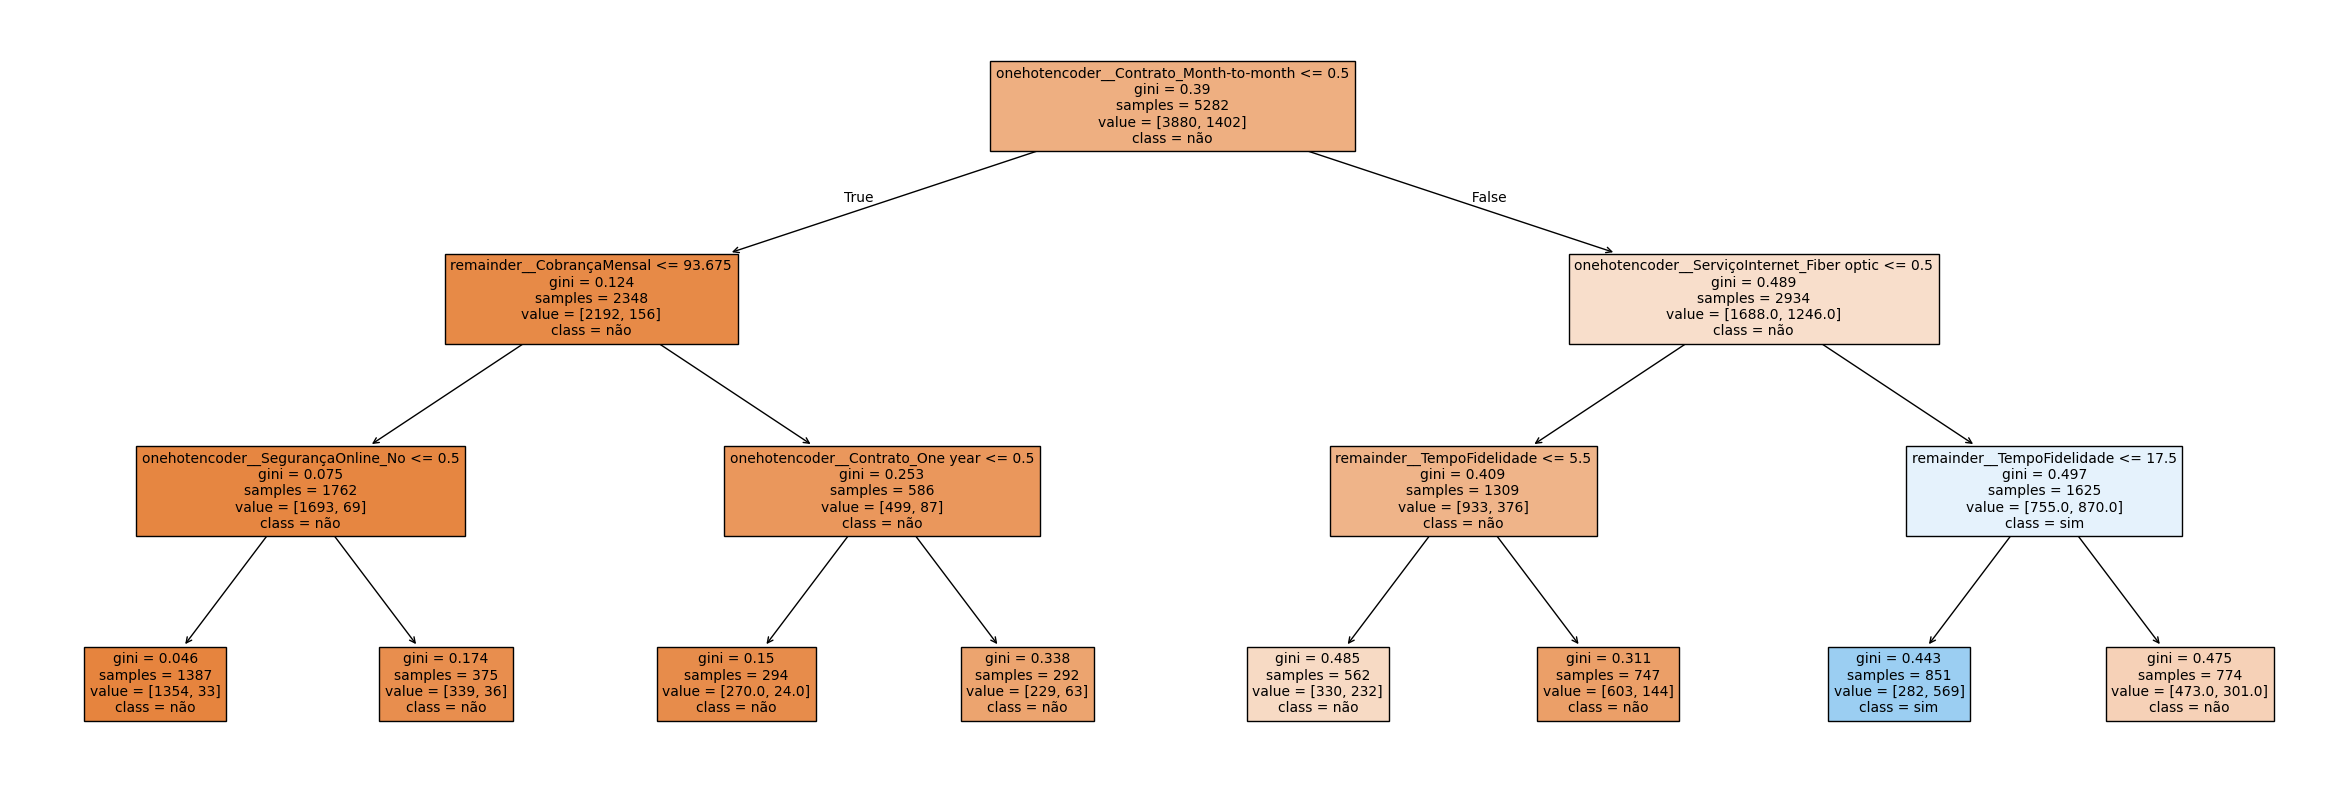

In [35]:
plt.figure(figsize=(30,10))
plot_tree(arvore, filled=True, class_names= ['não', 'sim'], fontsize = 10, feature_names = one_hot.get_feature_names_out(colunas));

# Criando modelo diferente com "**KNN**".

### O '**KNN**' faz um **cálculo de distância** entre os elementos da base de dados.

Para a criação desse modelo, vou **optar por normalizar os dados**, pois o data frame "telecomDF" tem algumas colunas: " TempoFidelidade ", " CobrançaMensal " e " CobrançaTotal "  com valores ***muito discrepantes***. Quando o algorítimo fizer o cálculo da distâncis, essas variáveis **terão um peso maior** , sendo que elas não precisa ser mais relevantes do que as outras para o cálculo.

Usarei o "**MinMaxScaler**" para a normalização desses dados.

In [36]:
from sklearn.preprocessing import MinMaxScaler

In [37]:
normalizacao = MinMaxScaler()

x_treino_normalizado = normalizacao.fit_transform(x_treino)

In [38]:
# Visualizando o resultado.

# Usarei o pd.DataFrame porque sem ele, os resultados virão em um 'array'. Eu
# prefiro a visualização do Pandas.

pd.DataFrame(x_treino_normalizado)

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.847222,0.0,1.0,0.429851,0.431921
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.958333,1.0,1.0,0.429851,0.475682
2,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,1.0,1.0,0.652778,1.0,1.0,0.663682,0.462653
3,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.986111,1.0,1.0,0.902985,0.882208
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.166667,1.0,0.0,0.254229,0.062287
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5277,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.375000,1.0,0.0,0.319403,0.162508
5278,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.486111,1.0,1.0,0.944776,0.450678
5279,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.361111,1.0,1.0,0.331343,0.149157
5280,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.041667,1.0,0.0,0.270647,0.016316


Como os dados já normalizados, agora, usarei o algorítimo "**KNN**".

In [39]:
from sklearn.neighbors import KNeighborsClassifier

In [40]:
knn = KNeighborsClassifier()

In [41]:
knn.fit(x_treino_normalizado, y_treino)

KNeighborsClassifier()

In [42]:
'''
Agora, como normalizei os dados de treino (x_treino_normalizado), vou normalizar
os dados de teste, para que ao usar o algorítimo KNN, não haja erro devido os
dados de TREINO (x_treino_normalizado) estarem normalizados, e os de TESTE, não.
'''

x_teste_normalizado = normalizacao.transform(x_teste)

Avaliando o desempenho do modelo **KNN** com os dados de teste (***normalizados***).

In [43]:
knn.score(x_teste_normalizado, y_teste)

0.7688813174332766

# Fazendo a **comparação** entre o modelo "***KNN*** " e o modelo "***Árvore de Decisão***."

Avaliando o desempenho entre os modelos com o **dummy**, **árvore de decisão** e o **knn**.

In [44]:
print(f'Acurácia Dummy: {dummy.score(x_teste, y_teste)}')
print(f'Acurácia Árvore de Decisão: {arvore.score(x_teste, y_teste)}')
print(f'Acurácia KNN: {knn.score(x_teste_normalizado, y_teste)}')

Acurácia Dummy: 0.7348097671777399
Acurácia Árvore de Decisão: 0.7995457126632595
Acurácia KNN: 0.7688813174332766


Dentre os 3 modelos, o melhor foi o de "***Árvore de Decisão.***" Sendo assim, esse será o modelo selecionado para implementação de **modelo preditivo**, capaz prever quais clientes têm maior chance de cancelar seus serviços (**evadir**).

# Avaliação dos Modelos usando métricas de:


*   **Acurácia**
*   **Precisão**
*   **Recall**
*   **F1-score**
*   **Matriz de confusão**

## Separando os dados novamente, mas, dessa vez em 3 partes: **Treino**, **Validação** e **Teste**.

In [45]:
'''
Agora, para calcular o desempenho dos modelos com essas MÉTRICAS ADICIONAIS, es-
tou criando novas variáveis para TESTE e TREINO. Elas terão o 'número 2' para di
ferenciá-las daquelas que foram criadas para as avaliações de desempenho, as mé-
tricas adicionais (Precisão, Recall, F1-score e Matriz de confusão) para essa
etapa não estavam presentes.

'''
x, x_teste2, y, y_teste2 = train_test_split(x, y, test_size = 0.15, stratify = y, random_state = 5)

x_treino2, x_val, y_treino2, y_val = train_test_split(x, y, stratify = y, random_state = 5)

In [46]:
modelo = DecisionTreeClassifier()
modelo.fit(x_treino2, y_treino2)

print(f'Acurácia de treino: {modelo.score(x_treino2, y_treino2)}')
print(f'Acurácia de validação: {modelo.score(x_val, y_val)}')

Acurácia de treino: 0.9975495656048118
Acurácia de validação: 0.7401469605878424


O desempenho dos dados de validação e teste não estão bons. Isso pode indicar que o algorítimo esteja decorando o padrão dos dados.

### Usando o "**max depth =** " para melhorar o desempenho do algorítimo.

In [47]:
modelo = DecisionTreeClassifier( max_depth = 10)
modelo.fit(x_treino2, y_treino2)

print(f'Acurácia de treino: {modelo.score(x_treino2, y_treino2)}')
print(f'Acurácia de validação: {modelo.score(x_val, y_val)}')

Acurácia de treino: 0.890621519269325
Acurácia de validação: 0.7655310621242485


Esse novo resultado mostra que o modelo está **copreendendo** o padrão e não **decorando** ele. Isso é o ideal.

### Avaliando o modelo usando a "**Matrix de Confusão** ".

In [48]:
from sklearn.metrics import confusion_matrix

In [49]:
y_previsto = modelo.predict(x_val)

matrix_confusao = confusion_matrix(y_val, y_previsto)

print(matrix_confusao)

[[950 150]
 [201 196]]


Visualizando melhor a **matrix de confusão**.

In [50]:
from sklearn.metrics import ConfusionMatrixDisplay

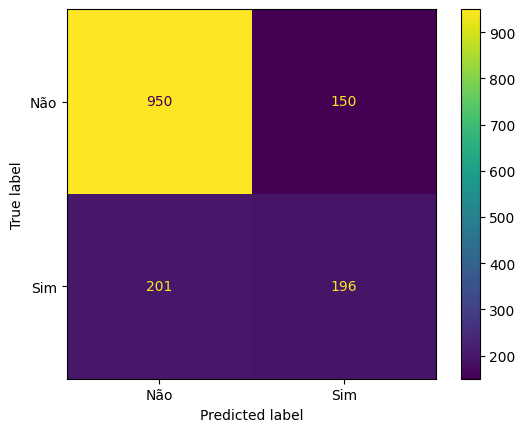

In [51]:
visualizacaoMatrix = ConfusionMatrixDisplay(confusion_matrix = matrix_confusao, display_labels = ['Não', 'Sim'])
visualizacaoMatrix.plot();

Esse modelo apresentou desempenho "**considerável**" com a **MATRIX DE CONFUSÃO**.

### Avaliação com: **Acurácia, Precisão e Recall**.

In [52]:
# Calculando acurácia
from sklearn.metrics import accuracy_score

In [53]:
print(f'Acurácia: {accuracy_score(y_val, y_previsto)}')


Acurácia: 0.7655310621242485


In [54]:
from sklearn.metrics import precision_score, recall_score

In [55]:
# Calculando precisão e o recall
print(f'Precisão: {precision_score(y_val, y_previsto)}')
print(f'Recall: {recall_score(y_val, y_previsto)}')

Precisão: 0.5664739884393064
Recall: 0.49370277078085645


O modelo ainda precisa melhorara (precisa estar **mais próximo de 1**). Como para esse modelo o "melhor seria não ter clientes evadindo" (cancelando o serviço/contrato), a métrica ideal seria a precisão (precision), e ela foi a que teve o melhor desempenho.

No entanto, como não houve uma diferança muito grande entre a precisão e o recall (precision e recall), vou usar o ***F1-Score*** para balancear essa métricas.

In [56]:
from sklearn.metrics import f1_score

In [57]:
print(f'F1-Score: {f1_score(y_val, y_previsto)}')

F1-Score: 0.5275908479138627


Resultado balanceado com o ***F1-Score está "aceitável"***, mas pode melhorar mais.

# Conclusão e análise final

Com a análise concluída, destaco dois fatores que influenciam muito na evasão de clientes: ***Tempo de contrato*** (tempo fidelidade) e ***Tipo de Serviço de Internet***. Para esse último, vou deixar um gráfico abaixo para melhor entendimento.

Evasão de clientes por **tipo de serviço de internet**.

In [73]:
# Criando o gráfico de barras agrupadas
fig = px.histogram(
    telecomDF,
    x='ServiçoInternet',
    color='Evasao_Clientes',
    barmode='group',  # Barras agrupadas lado a lado
    title='Relação entre Serviço de Internet x Evasão de Clientes<br>',
    labels={
        'ServiçoInternet': 'Tipo de Serviço de Internet',
        'Evasao_Clientes': 'Evasão de Clientes',
        'count': 'Contagem de Clientes'
    },
    category_orders={
        'ServiçoInternet': ['DSL', 'Fibra'],  # Ordem dos serviços
        'Evasao_Clientes': ['Não', 'Sim']
    },
    color_discrete_map={'Não': '#36A2EB', 'Sim': '#FF6384'}  # Cores escolhidas
)

# Personalizando o layout
fig.update_layout(
    xaxis_title='Tipo de Serviço de Internet',
    yaxis_title='Contagem de Clientes',
    legend_title='Evasão de Clientes',
    title_x=0.5,  # Centralizar o título
    margin=dict(t=80),  # Espaço para o subtítulo
    showlegend=True  # Mostrar legenda de cores
)

# Adicionando legenda adicional
fig.add_annotation(
    text="Legenda: 0 = Não, 1 = Sim",
    xref="paper",
    yref="paper",
    x=0.5,
    y=-0.20,
    showarrow=False,
    font=dict(size=12),
    align="center"
)

# Mostrando o gráfico
fig.show()

Com base na análise feita, possíveis ações a serem tomadas pela empresa para diminuir o cancelamento de contrato dos clientes são:



*   Desenvolver **modelos preditivos** capazes de prever quais clientes têm maior chance de cancelar seus serviços, com base na "***Árvore de Decisão***." (Modelo com ***melhor resultado***).

*   Encerrar a oferta do serviço de internet do tipo ***Fibra ótica*** (ou subtituí-lo por um outro serviço de internet).

*  Criar algum plano de fidelidade para clientes que tenham mais de 10 meses de contrato - a evasão é relevante com clientes com tempo de contrato ***entre 10 e 30 meses***.

